In [1]:
import argparse
import os
import zipfile
import joblib as pickle
from collections import OrderedDict
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

In [2]:
%ls

ModelPrototyping.ipynb  ModelTraining.ipynb


In [3]:
import pickle

def create_pickle(value=None, filename=None):
    """
    Serializes and saves a Python object to a file using pickle.

    This function takes a Python object and a filename, and serializes the object to a file with the specified name.
    If either the value or the filename is not provided, the function raises an exception.

    Parameters:
    - value: The Python object to serialize. Must not be None for the operation to proceed.
    - filename: The name of the file where the serialized object should be saved. Must not be None for the operation to proceed.

    Raises:
    - Exception: If either `value` or `filename` is None, indicating incomplete arguments for the operation.
    """
    if value is not None and filename is not None:
        with open(filename, "wb") as file:
            pickle.dump(value, file)
    else:
        raise Exception("Pickle file is empty".capitalize())

In [4]:
class Loader:
    """
    A Loader class for processing image datasets. This class is designed to handle the loading,
    extracting, and preprocessing of image data from a zip archive, preparing it for machine learning models.

    Attributes:
        image_path (str, optional): The path to the zip file containing the dataset. Default is None.
        batch_size (int): The number of images to process in each batch. Default is 64.
        image_height (int): The height to which each image will be resized. Default is 64 pixels.
        image_width (int): The width to which each image will be resized. Default is 64 pixels.
        normalized (bool): Flag to determine whether the images should be normalized. Default is True.
        raw_image_path (str): The path where extracted images are stored. Initially empty.
    """
    def __init__(self, image_path = None, batch_size = 64, image_height = 64, image_width = 64, normalized = True):
        """
        Initializes the Loader with the dataset path, batch size, image dimensions, and normalization flag.
        """
        self.image_path = image_path
        self.batch_size = batch_size
        self.image_height = image_height
        self.image_width = image_width
        self.normalized = normalized
        self.raw_image_path = ""

    def unzip_dataset(self, extract_to = None):
        """
        Extracts the dataset from a zip archive to a specified directory.

        Parameters:
            extract_to (str): The directory where the zip file contents will be extracted. If None, an exception is raised.

        Raises:
            Exception: If `extract_to` is None, indicating the path is not properly defined.
        """
        if extract_to is not None:
            with zipfile.ZipFile(file=self.image_path, mode="r") as zip_ref:
                zip_ref.extractall(path=extract_to)
        else:
            raise Exception("Path is not defined properly in unzip_dataset method".capitalize())

    def extract_features(self,):
        """
        Prepares the dataset by checking for or creating the necessary directories and unzipping the dataset.

        This method checks if a raw folder exists for the dataset; if not, it creates one and extracts the dataset there.
        """
        dataset_folder_name = "../data"
        extract_to = os.path.join(dataset_folder_name, "raw/")
        if os.path.exists(path = os.path.join(dataset_folder_name, "raw/")):
            print("raw folder already exists".title())
            try:
                self.unzip_dataset(extract_to = extract_to)
            except Exception as e:
                print("Error - {}".format(e))
            else:
                self.raw_image_path = os.path.join(dataset_folder_name, "raw/")
        else:
            print("raw folder does not exists and is about to create".title())
            try:
                os.makedirs(os.path.join(dataset_folder_name, "raw/"))
            except Exception as e:
                print("Error - {}".format(e))
            else:
                self.unzip_dataset(extract_to = extract_to)
                self.raw_image_path = os.path.join(dataset_folder_name, "raw/")

    def saved_dataloader(self, dataloader = None):
        """
        Saves the processed dataloader object to disk.

        Parameters:
            dataloader: The dataloader object to be saved. If None, an exception is raised.

        Raises:
            Exception: If `dataloader` is None, indicating it is not properly defined.
        """
        if dataloader is not None:
            processed_data_path = "../data"
            if os.path.exists(os.path.join(processed_data_path, "processed")):
                try:
                    create_pickle(value=dataloader, filename=os.path.join(processed_data_path, "processed/dataloader.pkl"))
                    print("done")
                except Exception as e:
                    print("Error - {}".format(e))
            else:
                print("Processed data folder is not exists and is about to create".capitalize())
                os.makedirs(os.path.join(processed_data_path, "processed"))
                try:
                    create_pickle(
                        value=dataloader,
                        filename=os.path.join(
                            processed_data_path, "processed/dataloader.pkl"
                        ),
                    )
                except Exception as e:
                    print("Error - {}".format(e))
        else:
            raise Exception("Dataloader is not defined properly in saved_dataloader method".capitalize())

    def create_dataloader(self):
        """
        Creates a dataloader with the specified transformations and batch size for the dataset.

        Returns:
            DataLoader: The DataLoader object for the dataset, ready for use in training or evaluation.
        """
        transform = transforms.Compose(
            [
                transforms.Resize((self.image_height)),
                transforms.CenterCrop(64),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ]
        )
        dataset = datasets.ImageFolder(root=self.raw_image_path, transform=transform)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.saved_dataloader(dataloader = dataloader)

        return dataloader

"""
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Image Preprocessing".capitalize())
    
    parser.add_argument("--image_path", help="Define the Image path".capitalize())
    parser.add_argument("--batch_size", default=64, type=int, help="Define the Batch Size".capitalize())
    parser.add_argument("--image_height", default=64, type=int, help="Define the Image Height".capitalize())
    parser.add_argument("--image_width", default=64, type=int, help="Define the Image Width".capitalize())
    
    args = parser.parse_args()
    
    if args.image_path is None:
        if args.batch_size and args.image_height and args.image_width:
            loader = Loader(
                image_path=args.image_path,
                batch_size=args.batch_size,
                image_height=args.image_height,
                image_width=args.image_width,
                normalized=True,
            )
            
            loader.extract_features()
            
            dataloader = loader.create_dataloader()
            
        else:
            raise ValueError("Please provide the image path".capitalize())
    else:
        raise ValueError("Please provide the image path".capitalize())
"""

'\nif __name__ == "__main__":\n    parser = argparse.ArgumentParser(description="Image Preprocessing".capitalize())\n    \n    parser.add_argument("--image_path", help="Define the Image path".capitalize())\n    parser.add_argument("--batch_size", default=64, type=int, help="Define the Batch Size".capitalize())\n    parser.add_argument("--image_height", default=64, type=int, help="Define the Image Height".capitalize())\n    parser.add_argument("--image_width", default=64, type=int, help="Define the Image Width".capitalize())\n    \n    args = parser.parse_args()\n    \n    if args.image_path is None:\n        if args.batch_size and args.image_height and args.image_width:\n            loader = Loader(\n                image_path=args.image_path,\n                batch_size=args.batch_size,\n                image_height=args.image_height,\n                image_width=args.image_width,\n                normalized=True,\n            )\n            \n            loader.extract_features()\n  

In [5]:
# Call the Loader class with arguments
if __name__ == "__main__":
    loader = Loader(
        image_path="/Users/shahmuhammadraditrahman/Desktop/archive.zip",
        batch_size=128,
        image_height=64,
        image_width=64,
        normalized=True,
    )
    
    dataloader = loader.extract_features()
    loader.create_dataloader()

Raw Folder Already Exists
done


#### Plot the Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

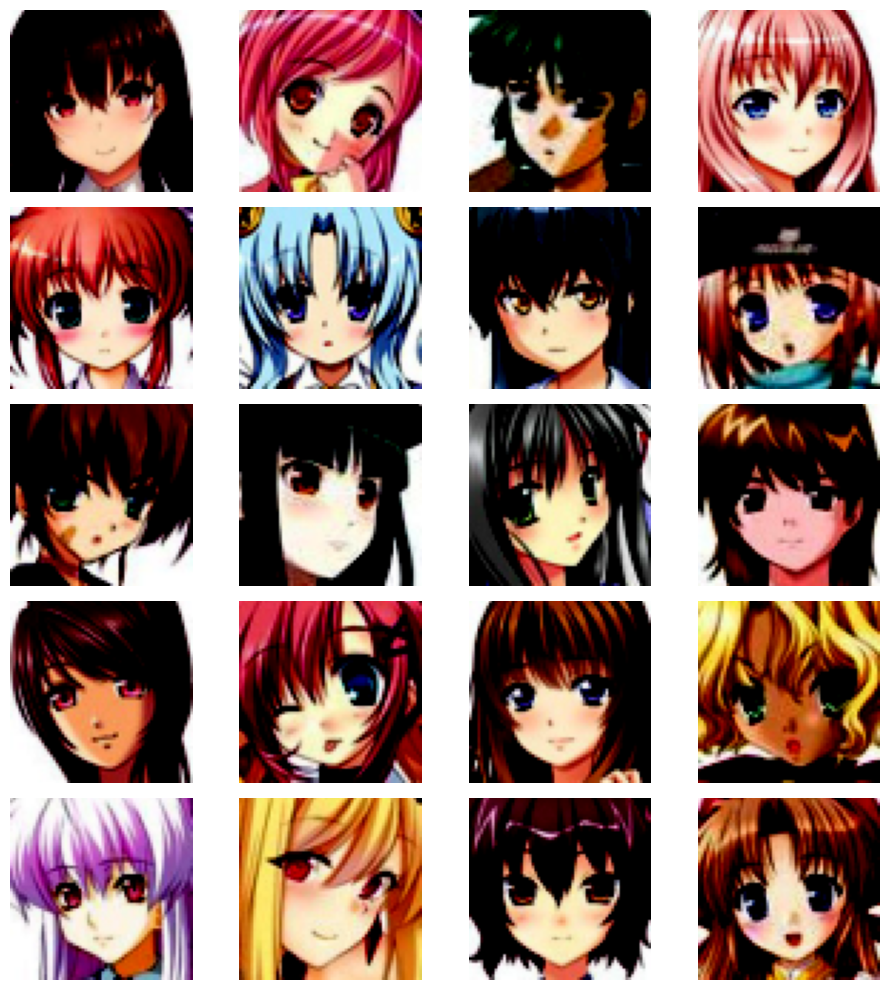

In [6]:
import joblib as pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def plot_images(dataloader_path):
    """
    This script loads a preprocessed dataset from a Pickle file and displays the first 20 images in a 5x4 grid format.

    The dataset is expected to be a dataloader object serialized with joblib (pickle), containing batches of images and their corresponding labels. The script iterates over the first batch of images, detaches them from any computational graph, and converts them from PyTorch tensors to numpy arrays for visualization. The images are assumed to be in the format (C, H, W) where C is the number of channels, H is the height, and W is the width of the images. The script transposes each image to (H, W, C) format suitable for plotting with matplotlib.

    Dependencies:
    - joblib: For loading the serialized dataloader object.
    - matplotlib: For plotting the images.
    - PyTorch: The script assumes that the dataloader returns PyTorch tensors.

    Usage:
    Ensure that the path to the dataloader pickle file (`dataloader_path`) is correctly set relative to the script's execution directory. The script checks for the existence of the specified file, loads the dataloader, retrieves the first batch of images, and plots them in a grid. If the file does not exist, it prints an error message.

    Warning suppression is enabled to ignore any warnings that might clutter the output, focusing solely on the visualization task.

    Note:
    This script is designed for visualization purposes and assumes the images have already been preprocessed and are ready for display. It does not perform any image preprocessing steps such as normalization or resizing.
    """
    if os.path.exists(dataloader_path):
        dataloader = pickle.load(dataloader_path)
        images, _ = next(iter(dataloader))
        images = images[0:20]
        
        plt.figure(figsize=(10, 10))
        
        for index, image in enumerate(images):
            plt.subplot(5, 4, index + 1)
            plt.imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
            plt.axis("off")
            plt.tight_layout()
        
        plt.show()
    else:
        print("Processed data does not exist".capitalize())

if __name__ == "__main__":
    dataloader_path = "../data/processed/dataloader.pkl"
    plot_images(dataloader_path = dataloader_path)

In [7]:
def total_params(model):
    """
    Calculates and prints the total number of parameters in a PyTorch model.

    Parameters:
        model (torch.nn.Module): The model to calculate parameters for.

    Returns:
        None. This function prints the total number of parameters directly.

    Example:
        >>> model = torch.nn.Linear(10, 5)
        >>> total_params(model)
        55
    """
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total number of parameters: {total_params}")

#### Create the Generator model

In [8]:
from collections import OrderedDict
import torch.nn as nn


class Generator(nn.Module):
    """
    The Generator class for a Generative Adversarial Network (GAN), responsible for generating synthetic images from a latent space vector.

    This module builds an architecture that progressively upsamples the input latent vector to a full-sized image (e.g., 64x64 pixels) through a series of ConvTranspose2d layers, each followed by BatchNorm2d and ReLU activations, except for the final layer which uses a Tanh activation to output RGB image data.

    Parameters:
    - nz (int): Size of the latent vector (z). Default is 100.
    - ngf (int): Defines the depth of feature maps carried through the generator, relating to the size of the generator's feature maps. Default is 64.

    Attributes:
    - layer_config (OrderedDict): An ordered dictionary specifying the layers and configurations of the generator model.
    - main (nn.Sequential): The sequential container that constitutes the generator, built from `layer_config`.

    The architecture details include upsampling from a latent vector to a 64x64 3-channel RGB image, progressively doubling the spatial dimensions of the feature maps while reducing their depth, starting from `ngf * 8` to `ngf`, and finally outputting to 3 channels.

    Methods:
    - forward(input): Defines the forward pass of the generator.

    Example:
        generator = Generator(nz=100, ngf=64)
        # Assuming `latent_vector` is a batch of random vectors from the latent space
        fake_images = generator(latent_vector)

    Note:
    The output images are normalized between -1 and 1, corresponding to the range of the Tanh activation function used in the final layer.

    Layer Details:
    - ConvTrans1: Upsamples the input latent vector to a spatial dimension of 4x4 with `ngf*8` feature maps.
    - BatchNorm1 and ReLU1: Applied after the first ConvTranspose2d layer.
    - ConvTrans2 to ConvTrans4: Further upsampling steps, each doubling the spatial dimensions and halving the depth of feature maps, with BatchNorm and ReLU activations.
    - ConvTrans5: Final upsampling step to produce a 3-channel RGB image of size 64x64. Followed by a Tanh activation.
    """
    def __init__(self, latent_space=100, image_size=64):
        self.nz = latent_space
        self.ngf = image_size
        super(Generator, self).__init__()

        self.layer_config = OrderedDict(
            [
                (
                    "convTrans1",
                    nn.ConvTranspose2d(self.nz, self.ngf * 8, 4, 1, 0, bias=False),
                ),
                ("batchNorm1", nn.BatchNorm2d(self.ngf * 8)),
                ("relu1", nn.ReLU(True)),
                (
                    "convTrans2",
                    nn.ConvTranspose2d(self.ngf * 8, self.ngf * 4, 4, 2, 1, bias=False),
                ),
                ("batchNorm2", nn.BatchNorm2d(self.ngf * 4)),
                ("relu2", nn.ReLU(True)),
                (
                    "convTrans3",
                    nn.ConvTranspose2d(self.ngf * 4, self.ngf * 2, 4, 2, 1, bias=False),
                ),
                ("batchNorm3", nn.BatchNorm2d(self.ngf * 2)),
                ("relu3", nn.ReLU(True)),
                (
                    "convTrans4",
                    nn.ConvTranspose2d(self.ngf * 2, self.ngf, 4, 2, 1, bias=False),
                ),
                ("batchNorm4", nn.BatchNorm2d(self.ngf)),
                ("relu4", nn.ReLU(True)),
                (
                    "convTrans5", nn.ConvTranspose2d(self.ngf, 3, 4, 2, 1, bias=False)
                ),
                ("tanh", nn.Tanh()),
            ]
        )

        self.main = nn.Sequential(self.layer_config)

    def forward(self, input):
        return self.main(input)

In [9]:
if __name__ == '__main__':
    generator = Generator()
    print(generator)

Generator(
  (main): Sequential(
    (convTrans1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (batchNorm1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (convTrans2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (convTrans3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (convTrans4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu4): ReLU(inplace=True)
    (convTrans5): ConvTranspose2d

In [10]:
total_params(model=generator)

Total number of parameters: 3576704


#### Create the Discriminator model

In [11]:
from collections import OrderedDict
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, image_size=64):
        self.ndf = image_size
        super(Discriminator, self).__init__()
        self.layer_config = OrderedDict(
            [
                ("conv1", nn.Conv2d(3, self.ndf, 4, 2, 1, bias=False)),
                ("leaky1", nn.LeakyReLU(0.2, inplace=True)),
                ("conv2", nn.Conv2d(self.ndf, self.ndf * 2, 4, 2, 1, bias=False)),
                ("bn2", nn.BatchNorm2d(self.ndf * 2)),
                ("leaky2", nn.LeakyReLU(0.2, inplace=True)),
                ("conv3", nn.Conv2d(self.ndf * 2, self.ndf * 4, 4, 2, 1, bias=False)),
                ("bn3", nn.BatchNorm2d(self.ndf * 4)),
                ("leaky3", nn.LeakyReLU(0.2, inplace=True)),
                ("conv4", nn.Conv2d(self.ndf * 4, self.ndf * 8, 4, 2, 1, bias=False)),
                ("bn4", nn.BatchNorm2d(self.ndf * 8)),
                ("leaky4", nn.LeakyReLU(0.2, inplace=True)),
                ("conv5", nn.Conv2d(self.ndf * 8, 1, 4, 1, 0, bias=False)),
                ("sigmoid", nn.Sigmoid()),
            ]
        )
        self.main = nn.Sequential(self.layer_config)

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

In [12]:
if __name__ == "__main__":
    discriminator = Discriminator()
    print(discriminator)

Discriminator(
  (main): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (leaky1): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky2): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky3): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv4): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky4): LeakyReLU(negative_slope=0.2, inplace=True)
    (conv5): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (sigmoid

In [13]:
# Check the total params in discriminator
total_params(model = discriminator)

Total number of parameters: 2765568


#### Weight Initialization

In [14]:
import torch.nn as nn


def weight_init(m):
    """
    Applies custom weight initialization to convolutional and batch normalization layers of a neural network.

    This function initializes the weights of convolutional layers (`Conv2d`, `ConvTranspose2d`, etc.) with a normal distribution
    centered at 0 with a standard deviation of 0.02. For batch normalization layers (`BatchNorm2d`, etc.), it initializes the weights
    with a normal distribution centered at 1 with a standard deviation of 0.02, and sets the bias to 0.

    This initialization can help in stabilizing the learning process in generative adversarial networks (GANs) or other deep learning models.

    Parameters:
        m (torch.nn.Module): A PyTorch module, typically a layer of a neural network model. The function checks the class name of `m`
                             to determine whether it is a convolutional layer or a batch normalization layer and applies the appropriate
                             initialization.

    Example:
        >>> model = MyModel()
        >>> model.apply(weight_init)

    Note:
        The function directly modifies the input module `m` and does not return any value. It is designed to be used with the `apply`
        method of `torch.nn.Module`, which applies a function recursively to every submodule.
    """
    classname = m.__class__.__name__

    # Apply normal distribution to weights of Convolutional layers
    if classname.find("Conv") != -1:
        nn.init.normal_(tensor=m.weight.data, mean=0.0, std=0.02)

    # Apply normal distribution to weights and set bias to 0 for BatchNorm layers
    elif classname.find("BatchNorm") != -1:
        nn.init.normal_(tensor=m.weight.data, mean=1.0, std=0.02)
        nn.init.constant_(tensor=m.bias.data, val=0)

#### Device initialization

In [15]:
def device_init(device=None):
    """
    Initializes and returns a PyTorch device based on the specified preference and availability.

    This function is designed to facilitate the dynamic selection of the computational device for PyTorch operations,
    allowing the user to preferentially select 'mps' (Apple Silicon GPU) or 'cuda' (NVIDIA GPU) devices. If the preferred
    device is not available, or if no preference is specified, it defaults to using the CPU.

    Parameters:
        device (str, optional): The preferred device to use for PyTorch operations. Valid options are 'mps', 'cuda', or None.
                                If 'mps' is selected, the function will check for Apple Silicon GPU availability. For 'cuda',
                                it checks for NVIDIA GPU availability. If None or if the preferred device is not available,
                                it defaults to 'cpu'. Defaults to None.

    Returns:
        torch.device: The initialized PyTorch device object, ready to be used for model operations or data manipulation.

    Example:
        >>> device = device_init("cuda")
        >>> print(device)
        device(type='cuda')  # This output depends on the availability of CUDA.

    Note:
        - The 'mps' device option is specifically for machines with Apple Silicon GPUs.
        - It's recommended to explicitly specify your device preference when calling this function to ensure your computations
          are performed on the desired hardware, when available.
    """
    if device == "mps":
        return torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    elif device == "cuda":
        return torch.device("cuda" if torch.cuda.is_available() else "cpu")
    else:
        return torch.device("cpu")
    
if __name__ == "__main__":
    print(device_init(device="mps"))

mps


In [16]:
# Connect the GPU

device = device_init(device="mps")
print("The device # {} ".format(device))

# generator = Generator().to(device)
# discriminator = Discriminator().to(device)

# # Connect the weight
# generator.apply(weight_init)
# discriminator.apply(weight_init)

# print("Done")

The device # mps 


In [17]:
import joblib as pickle

dataloader_path = "../data/processed/dataloader.pkl"
dataloader = pickle.load(dataloader_path)

In [18]:
data, label = next(iter(dataloader))

data.shape

torch.Size([128, 3, 64, 64])

In [19]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

#### Train the model

In [20]:
import torch.optim as optim
num_epochs = 30
nz = 100
# Create the generator and discriminator
netG = Generator().to(device)
netD = Discriminator().to(device)


# Initialize weights
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


netG.apply(weights_init)
netD.apply(weights_init)

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()
# Training
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        # Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ## Train with all-real batch
        netD.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update G network: maximize log(D(G(z)))
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        print(
            "[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f"
            % (
                epoch,
                num_epochs,
                i,
                len(dataloader),
                errD.item(),
                errG.item(),
                D_x,
                D_G_z1,
                D_G_z2,
            )
        )

[0/30][0/497] Loss_D: 1.7707 Loss_G: 6.7180 D(x): 0.7450 D(G(z)): 0.6855 / 0.0024
[0/30][1/497] Loss_D: 0.5031 Loss_G: 6.8991 D(x): 0.9025 D(G(z)): 0.2960 / 0.0015
[0/30][2/497] Loss_D: 0.3102 Loss_G: 6.8340 D(x): 0.9278 D(G(z)): 0.1858 / 0.0017
[0/30][3/497] Loss_D: 0.2164 Loss_G: 7.2772 D(x): 0.9665 D(G(z)): 0.1504 / 0.0010
[0/30][4/497] Loss_D: 0.2805 Loss_G: 7.3301 D(x): 0.9087 D(G(z)): 0.1301 / 0.0011
[0/30][5/497] Loss_D: 0.1527 Loss_G: 8.1528 D(x): 0.9817 D(G(z)): 0.1158 / 0.0005
[0/30][6/497] Loss_D: 0.0886 Loss_G: 7.7032 D(x): 0.9721 D(G(z)): 0.0527 / 0.0007
[0/30][7/497] Loss_D: 0.1330 Loss_G: 8.1799 D(x): 0.9744 D(G(z)): 0.0852 / 0.0004
[0/30][8/497] Loss_D: 0.1007 Loss_G: 8.4193 D(x): 0.9687 D(G(z)): 0.0568 / 0.0004
[0/30][9/497] Loss_D: 0.1420 Loss_G: 8.3001 D(x): 0.9596 D(G(z)): 0.0531 / 0.0004
[0/30][10/497] Loss_D: 0.1187 Loss_G: 10.0763 D(x): 0.9792 D(G(z)): 0.0836 / 0.0001
[0/30][11/497] Loss_D: 0.0431 Loss_G: 8.8024 D(x): 0.9778 D(G(z)): 0.0168 / 0.0002
[0/30][12/497

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

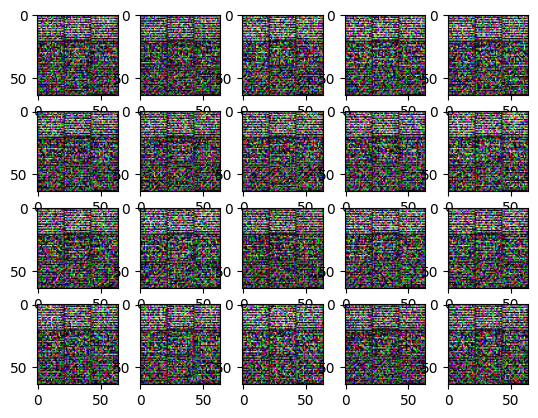

In [ ]:
import torch
import matplotlib.pyplot as plt

noise_data = torch.randn(20, 100, 1, 1).to(device)
generator = Generator().to(
    device
) 
synthetic_images = generator(noise_data)
plt.figure(figsize=(10, 8)) 

for index, image in enumerate(synthetic_images):
    plt.subplot(4, 5, index + 1)
    image_to_plot = (
        image.cpu().detach().permute(1, 2, 0).numpy()
    )
    image_to_plot = (image_to_plot - image_to_plot.min()) / (
        image_to_plot.max() - image_to_plot.min()
    )  # Normalize
    plt.imshow(image_to_plot)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Trainer:
    """
    Trainer class for a Generative Adversarial Network (GAN) encapsulates the training process, including initialization, training loops for the discriminator and generator, and saving the model. It handles training over a specified number of epochs, optimizes both the generator and discriminator models, and logs training progress.

    Parameters:
    - device (torch.device): The device to train on, e.g., 'cpu' or 'cuda'.
    - latent_space (int, optional): Dimension of the latent space vector. Defaults to 100.
    - image_size (int, optional): Height and width of the images to generate. Defaults to 64.
    - lr (float, optional): Learning rate for the Adam optimizers. Defaults to 0.0002.
    - epochs (int, optional): Number of training epochs. Defaults to 100.

    Attributes:
    - netG (Generator): The generator model.
    - netD (Discriminator): The discriminator model.
    - optimizerD (torch.optim.Optimizer): Optimizer for the discriminator.
    - optimizerG (torch.optim.Optimizer): Optimizer for the generator.
    - criterion (nn.Module): Loss function (Binary Cross Entropy Loss).
    - real_label (float): Label for real images (1.0).
    - fake_label (float): Label for fake images (0.0).
    - nz (int): Size of the latent vector (z).
    - num_epochs (int): Number of epochs for training.

    Methods:
    - model_init(): Initializes the models and applies weights initialization.
    - optimizer_init(generator, discriminator): Initializes the optimizers for both models.
    - train_discriminator(data): Performs a single training step for the discriminator.
    - train_generator(fake): Performs a single training step for the generator.
    - display_results(epoch, i, dataloader, errD, errG, D_x, D_G_z1, D_G_z2): Logs training progress to the console.
    - save_generator_model(epoch): Saves the current state of the generator model.
    - dataloader(): Loads and returns a dataloader instance.
    - train(): Executes the training loop over the specified number of epochs.

    Example:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        trainer = Trainer(device=device, epochs=30, lr=0.0002)
        trainer.train()

    Note:
    This class assumes the presence of `Generator` and `Discriminator` classes, along with a `weights_init` function for model weight initialization. The dataloader is expected to be loaded using joblib from a specified path.
    """
    def __init__(self, device, latent_space = 100, image_size = 64, lr = 0.0002, epochs = 100):
        self.device = device
        self.latent_space = latent_space
        self.image_size = image_size
        self.lr = lr
        self.epochs = epochs

        self.netG, self.netD = self.model_init()
        self.optimizerD, self.optimizerG = self.optimizer_init()
        self.criterion = nn.BCELoss()

        self.real_label = 1
        self.fake_label = 0
        self.nz = self.latent_space
        self.num_epochs = self.epochs

    def model_init(self):
        """
        Initializes the Generator and Discriminator models for the GAN. This method constructs the models with the specified latent space size and image size, moves them to the appropriate device (CPU or GPU), and applies a predefined weight initialization function to both models.

        The models are defined by the Generator and Discriminator classes, which should be available in the same scope as this Trainer class. The latent space size and image size are used to configure the models according to the specifics of the GAN architecture being trained.

        Returns:
            tuple: A tuple containing two nn.Module objects:
                - netG (Generator): The initialized generator model, ready for training.
                - netD (Discriminator): The initialized discriminator model, ready for training.

        Side effects:
            - Instantiates the Generator and Discriminator models with the specified configurations.
            - Applies a predefined weight initialization function to both models to ensure optimal training behavior.
            - Moves the models to the specified device, which is typically determined by whether a GPU is available for training.

        Note:
            The device used for training is determined by the 'device' attribute of the Trainer class instance. The weights initialization function applied to both models is defined externally and must be available in the same scope as this Trainer class.
        """
        netG = Generator(
            latent_space=self.latent_space, image_size=self.image_size
        ).to(device)
        netD = Discriminator(image_size=self.image_size).to(device)
        netG.apply(weights_init)
        netD.apply(weights_init)

        return netG, netD

    def optimizer_init(self, generator, discriminator):
        """
        Initializes the optimizers for both the generator and discriminator models. This method sets up Adam optimizers with specified learning rates and betas parameters, which are critical for the training dynamics of the Generative Adversarial Network (GAN).

        Parameters:
        - generator (torch.nn.Module): The generator model for which the optimizer will be initialized. This model should already be instantiated and configured with the appropriate architecture for generating images.
        - discriminator (torch.nn.Module): The discriminator model for which the optimizer will be initialized. This model should already be instantiated and configured with the appropriate architecture for discriminating between real and generated images.

        Returns:
        - tuple: A tuple containing two optimizer objects:
            - optimizerD (torch.optim.Adam): The Adam optimizer configured for the discriminator model, including learning rate and betas parameters.
            - optimizerG (torch.optim.Adam): The Adam optimizer configured for the generator model, including learning rate and betas parameters.

        Note:
        - The learning rate (`lr`) and betas parameters for the Adam optimizers are critical hyperparameters that can affect the training stability and convergence of the GAN. These parameters are set based on best practices and empirical results but may require adjustment based on the specific characteristics of the dataset or model architecture.
        - This method assumes that the `lr` attribute (learning rate) is already set in the Trainer class instance and uses this value for both optimizers. The betas parameters are fixed in this implementation but could be exposed as parameters or attributes for more flexibility.
        """
        optimizerD = optim.Adam(discriminator.parameters(), lr=self.lr, betas=(0.5, 0.999))
        optimizerG = optim.Adam(generator.parameters(), lr=self.lr, betas=(0.5, 0.999))

        return optimizerD, optimizerG

    def train_discriminator(self, data):
        """
        Trains the discriminator model on both real and generated (fake) images. This method performs a forward pass with real images from the dataset and fake images generated by the generator, computes the loss for both, backpropagates to update the discriminator's weights, and returns the losses and discriminator outputs.

        Parameters:
        - data (torch.Tensor): A batch of real images from the dataset. This tensor should have the shape (N, C, H, W), where N is the batch size, C is the number of channels, and H and W are the height and width of the images.

        Returns:
        - tuple: A tuple containing the following elements:
            - errD (torch.Tensor): The total discriminator loss calculated as the sum of the loss for real and fake images.
            - D_x (float): The mean output of the discriminator for real images. This value is used to evaluate the discriminator's performance on real data.
            - D_G_z1 (float): The mean output of the discriminator for fake images before the generator update. This value is used to evaluate the discriminator's performance on fake data.
            - fake (torch.Tensor): A batch of fake images generated by the generator.

        The method performs the following steps:
        1. Zeroes the gradients of the discriminator.
        2. Processes a batch of real images, computes the loss against the true labels, backpropagates the error, and calculates the mean discriminator output (D_x).
        3. Generates a batch of fake images using the generator, computes the loss against the false labels, backpropagates the error, and calculates the mean discriminator output for the fake images (D_G_z1).
        4. Updates the discriminator's weights based on the total loss.

        Note:
        - This method updates the discriminator's weights once per call, using the combined loss from both real and fake images.
        - The real_label and fake_label attributes of the Trainer class are used to denote the true and false labels, respectively, for computing the loss.
        """
        self.netD.zero_grad()
        real_cpu = data[0].to(self.device)
        batch_size = real_cpu.size(0)
        label = torch.full(
            (batch_size,), self.real_label, dtype=torch.float, device=self.device
        )
        output = self.netD(real_cpu)
        errD_real = self.criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, self.nz, 1, 1, device=self.device)
        fake = self.netG(noise)
        label.fill_(self.fake_label)
        output = self.netD(fake.detach())
        errD_fake = self.criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        self.optimizerD.step()

        return errD, D_x, D_G_z1, fake

    def train_generator(self, fake):
        self.netG.zero_grad()
        label = torch.full(
            (fake.size(0),), self.real_label, dtype=torch.float, device=self.device
        )
        output = self.netD(fake)
        errG = self.criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        self.optimizerG.step()

        return errG, D_G_z2

    def display_results(self, epoch, i, dataloader, errD, errG, D_x, D_G_z1, D_G_z2):
        """
        Displays the training results and progress metrics for the current batch and epoch.

        This method logs the losses of the discriminator and generator, as well as the discriminator's performance on real and fake images. It provides insights into how well the discriminator and generator are learning and adapting during the training process.

        Parameters:
        - epoch (int): The current epoch number during training.
        - i (int): The current batch number within the epoch.
        - dataloader (DataLoader): The DataLoader used for training, utilized here to determine the total number of batches.
        - errD (float): The current loss of the discriminator.
        - errG (float): The current loss of the generator.
        - D_x (float): The average output of the discriminator for real images. Closer to 1 indicates better performance on real images.
        - D_G_z1 (float): The average output of the discriminator for fake images before the generator update. Closer to 0 indicates better discrimination of fake images.
        - D_G_z2 (float): The average output of the discriminator for fake images after the generator update. Closer to 1 indicates the generator is improving in fooling the discriminator.

        Output:
        - The method prints a formatted string to the console, summarizing the training metrics for the current batch within the ongoing epoch.

        Note:
        - This method is intended for logging purposes and does not return any values. It provides a snapshot of the training progress at the moment it is called, allowing for monitoring of the GAN's learning dynamics.
        """
        print(
            f"[{epoch}/{self.num_epochs}][{i}/{len(dataloader)}] Loss_D: {errD:.4f} Loss_G: {errG:.4f} D(x): {D_x:.4f} D(G(z)): {D_G_z1:.4f} / {D_G_z2:.4f}"
        )

    def save_generator_model(self, epoch):
        """
        Saves the state dictionary of the generator model to a file, capturing its current weights.

        This method is typically called at the end of each training epoch to persist the state of the generator model, allowing for later use or further training from the saved state. The filename includes the epoch number for easy identification and versioning.

        Parameters:
        - epoch (int): The current epoch number. This is used to name the saved model file, indicating at which point in the training process the model was saved.

        Output:
        - The method saves the generator's state dictionary to a file in the current working directory. The file is named 'generator_epoch_{epoch}.pth', where `{epoch}` is replaced with the current epoch number.

        Note:
        - This method does not return any value. It performs a file I/O operation to write the generator model's state dictionary to disk.
        """
        torch.save(self.netG.state_dict(), f"generator_epoch_{epoch}.pth")

    def dataloader(self):
        """
        Loads and returns the training data loader from a serialized file.

        This method is responsible for loading the training data loader, which has been previously saved to disk using serialization (e.g., with joblib). It allows for quick loading of preprocessed and prepared batches of data for training.

        Returns:
        - DataLoader: The loaded DataLoader object ready for iteration. This dataloader is expected to yield batches of training data during the training loop.

        Note:
        - The dataloader is loaded from a predefined path '../data/processed/dataloader.pkl'. This path must exist and contain a serialized DataLoader object. The method assumes the preprocessing and preparation of data are already completed and saved to this location.
        - This method performs a file I/O operation to read the DataLoader object from disk. Ensure the specified path is accessible and the file format is compatible with the joblib library.
        """
        return joblib.load("../data/processed/dataloader.pkl")

    def train(self):
        """
        Executes the training loop for the Generative Adversarial Network (GAN).

        This method orchestrates the training process by iterating over a specified number of epochs, during which it trains the discriminator and generator models in sequence. At each step of the training, it logs the progress, including the losses of both models and the discriminator's performance metrics. At the end of each epoch, it saves the current state of the generator model.

        The training loop follows these steps:
        1. Loads the data using the `dataloader` method, which should return an iterable DataLoader object containing the training data.
        2. Iterates over the specified number of epochs (as defined by `self.num_epochs`).
            a. For each batch in the DataLoader:
                i. Trains the discriminator on both real and fake data, computing its loss.
                ii. Generates a new batch of fake data and trains the generator, attempting to fool the discriminator, computing its loss.
                iii. Logs the current losses and discriminator performance metrics using the `display_results` method.
        3. Saves the state of the generator model after each epoch using the `save_generator_model` method.

        Note:
        - The actual training of the discriminator and generator is performed by the `train_discriminator` and `train_generator` methods, respectively. This method coordinates these calls and handles logging and model state saving.
        - Progress logging and model saving are designed to provide insights into the training process and to allow for interruption and resumption of training without loss of progress.
        """
        dataloader = self.dataloader()
        for epoch in range(self.num_epochs):
            for i, data in enumerate(dataloader, 0):
                errD, D_x, D_G_z1, fake = self.train_discriminator(data)
                errG, D_G_z2 = self.train_generator(fake)
                self.display_results(
                    epoch, i, dataloader, errD, errG, D_x, D_G_z1, D_G_z2
                )
            self.save_generator_model(epoch)


trainer = Trainer(device = device, epochs= 30, lr = 0.0002,)
trainer.train(dataloader)